# Lorenz System Simulation 


> "Simulate the Lorenz system  with Python"

- toc:false
- branch: master
- badges: false
- comments: false
- author: Alexandros Giavaras
- categories: [lorenz-system, Python, simulation, numerics]

The <a href="https://en.wikipedia.org/wiki/Lorenz_system">Lorenz system</a> is a system of ordinary differential equations first studied by Edward Lorenz. The system of ODEs is given below

$$\dot{x} = \sigma(y -x), ~~ \dot{y} = x (\rho - z) -y, ~~ \dot{z} = xy - \beta z$$

The model has three parameters i.e. $\sigma, \rho$ and $\beta$.

It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system. In popular media the 'butterfly effect' stems from the real-world implications of the Lorenz attractor, i.e. that in any physical system, in the absence of perfect knowledge of the initial conditions (even the minuscule disturbance of the air due to a butterfly flapping its wings), our ability to predict its future course will always fail. This underscores that physical systems can be completely deterministic and yet still be inherently unpredictable even in the absence of quantum effects. The shape of the Lorenz attractor itself, when plotted graphically, may also be seen to resemble a butterfly. 

In [3]:
import numpy as np

In [4]:
class ODE45(object):
    pass

In [5]:
def lorenz(t: float, x:np.array, beta: np.array) -> np.array:
    
    result = np.array([beta[0]*(x[1] - x[0]),
                      x[0]*(beta[1] - x[2]) - x[1],
                      x[0]*x[1] - beta[2]*x[2]])
    return result

In [6]:
beta = np.array([10., 28., 8./3.])
x0 = np.array([0., 1.0, 20.])
dt = 0.001
n_steps = 50000

The following video discusses how to simulate the Lorenz system with Matlab.

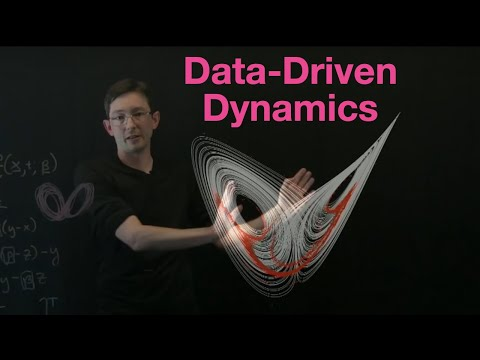

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EnsB1wP3LFM', width=800, height=300)